## Druga funkcja celu z niezerową miarą drugiego indykatora

Naszym celem jest teraz wykreować sytuację, w której drugi indykator nie bazował na zbiorze o zerowej mierze. Dążymy więc do tego, by zbiór

$$D = \Big{\{} \frac{dP}{dQ} = \tilde{a} H \Big{\}}$$

miał dodatnią miarę. Kluczowym momentem w poprzednim dowodzie było doprowadzenie powyższego zbioru do postaci

$$D = \Big{\{} e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} = \tilde{a} \cdot H \Big{\}},$$

a zerowość wynikała z payoffu klasycznej funkcji call, a konkretnie odejmowania współczynnika, którego nie można było wyzerować. Oznacza to, że aby osiagnąć cel musimy znaleźć opcję o innym payoffie, a powyższy dowodów sugeruje, że zapewne udałoby się dopasować w niej współczynniki jeśli jej payoff będzie miał charakter multiplikatywny. Wprowadzamy więc taką opcję, którą nazwyamy autorsko Procentową Opcją Call. Przedstawiamy jej działanie poniżej.

**Procentowa Opcja Call:** <br>
Posiadacz opcji zyskuje możliwość zakupu w chwili $T$ aktywa po cenie $p \cdot S_{T}$, jeśli cena przekroczy próg $K$ $(\text{dla }p \in (0,1))$. <br>

**Payoff:** $H = \left( S_{T} - p \cdot S_{T} \right) \cdot \mathbb{1}_{\{ S_{T} > K \}} = \left( 1 - p \right) \cdot S_{T}  \cdot \mathbb{1}_{\{ S_{T} > K \}}$

Spójrzmy jak on wygląda:

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sb
from underlying import Underlying
from option import Option, Vanilla
from trader import Trader
from tqdm import tqdm
from quantile_hedging_calculator import *

mu = 0.02
sigma = 0.1
r = 0.01
T = 1
X0 = 100
K = 110
p = 0.8
l = (mu-r)/sigma
values_per_year = 250

def measure_payoff(X,p,K):
    return (1-p)*X.iloc[:, -1]*(X.iloc[:, -1] > K)

#Przedstawienie jak wyglada payoff tej funkcji z perspektywy S_T i porównanie do klasycznej
ST = np.arange(70,141,1)
X = np.zeros(shape=(len(ST),2))
X[:,0], X[:,1] = X0, ST
X = pd.DataFrame(X)

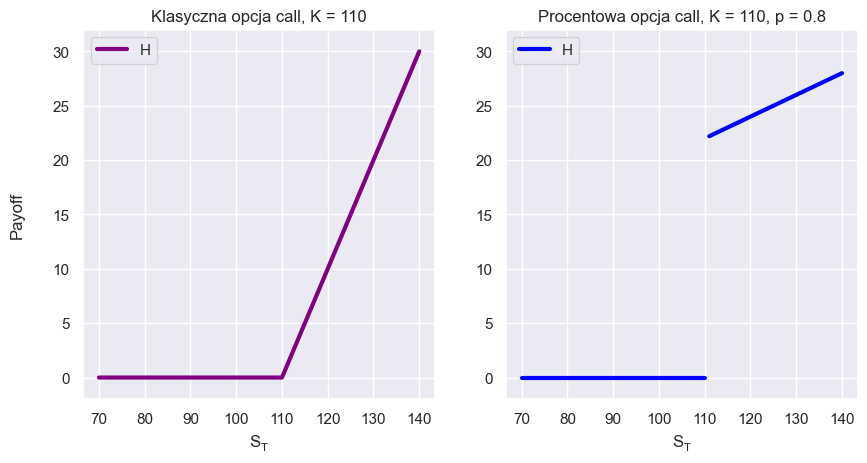

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{S_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{S_T}$')

# Payoff klasycznej funkcji call
ax1.plot(ST,np.array((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)), color = 'purple', linewidth = 3, label='H')
ax1.set_ylim(top=max(max((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)),max(measure_payoff(X.iloc[ST>K,:],p,K)))+2)
ax1.set_ylim(bottom = -2)
ax1.set_title('Klasyczna opcja call, K = ' + str(K))
ax1.legend(loc="upper left")
ax1.set_xticks(np.arange(70,141,10))

# Payoff procentowej opcji call
ax2.plot(ST[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3, label='H')
ax2.plot(ST[ST>K],np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'blue', linewidth = 3)
ax2.set_ylim(top=max(max((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)),max(measure_payoff(X.iloc[ST>K,:],p,K)))+2)
ax2.set_ylim(bottom = -2)
ax2.set_title('Procentowa opcja call, K = ' + str(K) + ', p = ' +  str(p))
ax2.legend(loc="upper left")
ax2.set_xticks(np.arange(70,141,10))

plt.show()


Zobaczmy, że taka opcja rzeczywiście może spełniać powyższy warunek. Podstawiamy za $H$ policzony payoff i otrzymujemy

$$D = \Big{\{} e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} = \tilde{a} \cdot \left( 1 - p \right) \cdot S_{T} \cdot \mathbb{1}_{\{ S_{T} > K \}}  \Big{\}}$$

oraz po rozpisaniu $S_{T}$

$$D = \Big{\{} e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} = \tilde{a} \cdot \left( 1 - p \right) \cdot e^{\left(\mu - \frac{\sigma^{2}}{2}\right)T + \sigma W_{T}} \cdot \mathbb{1}_{\{ S_{T} > K \}}  \Big{\}}.$$

Intuicja za powyższym warunkiem $\left( D = \Big{\{} \frac{dP}{dQ} = \tilde{a} H \Big{\}} \right)$:

In [48]:
WT = np.arange(-2,8,0.01)
ST = X0*np.exp((mu-sigma**2/2)*T+sigma*WT)
X = np.zeros(shape=(len(ST),2))
X[:,0], X[:,1] = X0, ST
X = pd.DataFrame(X)

#plt.plot(WT,np.array(a_wave*measure_payoff(X,p,1.1)))
#Radon-Nikodym
dP_dQ = np.exp(l*WT+0.5*l**2*T)

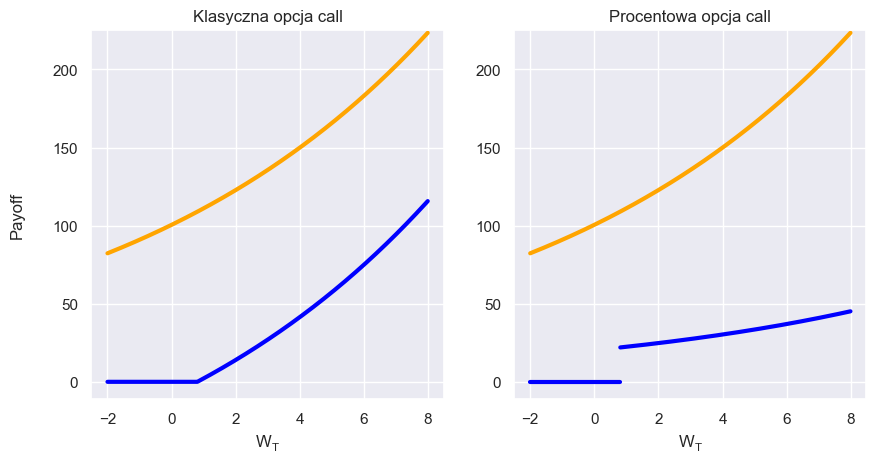

In [49]:
################
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{W_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{W_T}$')
#ax2.set_ylabel('Payoff', labelpad=20)

# Payoff klasycznej funkcji call
ax1.plot(WT,np.array((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)), color = 'blue', linewidth = 3)
ax1.plot(WT, X0*dP_dQ, color = 'orange', linewidth = 3)
ax1.set_ylim(top=max(X0*dP_dQ)+2)
ax1.set_title('Klasyczna opcja call')

# Payoff procentowej opcji call
ax2.plot(WT[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3)
ax2.plot(WT[ST>K],np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'blue', linewidth = 3)
ax2.plot(WT, X0*dP_dQ, color = 'orange', linewidth = 3)
ax2.set_title('Procentowa opcja call')
ax2.set_ylim(top=max(X0*dP_dQ)+2)
plt.show()

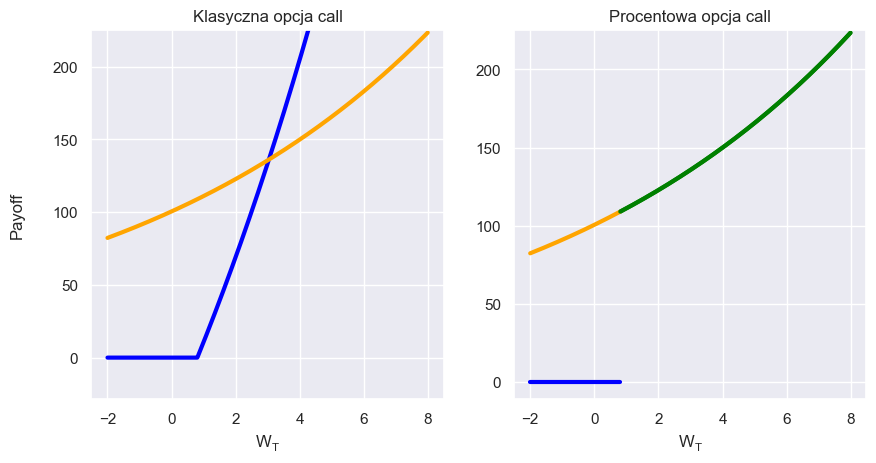

In [51]:
#Przeskalowane przez a_wave
a_wave = np.exp((sigma**2-mu)*T)/(1-p)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{W_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{W_T}$')
#ax2.set_ylabel('Payoff', labelpad=20)

# Payoff klasycznej funkcji call
ax1.plot(WT,a_wave*np.array((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)), color = 'blue', linewidth = 3)
ax1.plot(WT, X0*dP_dQ, color = 'orange', linewidth = 3)
ax1.set_ylim(top=max(X0*dP_dQ)+2)
ax1.set_title('Klasyczna opcja call')
ax1.plot()

# Payoff procentowej opcji call
ax2.plot(WT[ST<=K],np.array(a_wave*measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3)
ax2.plot(WT[ST>K],np.array(a_wave*measure_payoff(X.iloc[ST>K,:],p,K)), color = 'green', linewidth = 3)
ax2.plot(WT[ST<=K], X0*dP_dQ[ST<=K], color = 'orange', linewidth = 3)
ax2.plot(WT[ST>K], X0*dP_dQ[ST>K], color = 'green', linewidth = 3)
ax2.set_title('Procentowa opcja call')
ax2.set_ylim(top=max(X0*dP_dQ)+2)
plt.show()


Ponieważ $W_{T}$ jest traktowany jako *zmienna* tych funkcji, to w celu zapewnienia równości (na przedziale $S_{T} > K$) musimy zapewnić równość współczynników przy $W_{T}$ oraz tych mnożących funkcję funkładniczą. Daje to kluczowy warunek:

$$\lambda = \sigma,$$

co po rozpisaniu $\lambda = \frac{\mu-r}{\sigma}$ daje

$$\mu - r = \sigma^{2}.$$

Możemy teraz skrócić cześci potęg związanych z $W_{T}$ oraz użyć powyższego warunku do podstawienia pod $\lambda$ i przenieść eksponens na jedną stronę, aby orzymać

$$D = \Big{\{} e^{\left(\sigma^{2} - \mu \right)T} = \tilde{a} \cdot \left( 1 - p \right) \cdot \mathbb{1}_{\{ S_{T} > K \}}  \Big{\}}.$$

Problematyczną kwestią zostaje wartość parametru $\tilde{a}$, ponieważ nie wiemy, czy nasz warunek spowodował, że powyżej rzeczywiście może zachodzi równość. Przyjrzyjmy się więc temu. Z definicji mamy

$$\tilde{a} = inf \Big{\{} a: Q^{*} \left( \frac{dP}{dQ} > a \cdot H \right) \leq \alpha \Big{\}},$$

podstawiamy $\frac{dP}{dQ}$ i $H$

$$\tilde{a} = inf \Big{\{} a: Q^{*} \left( e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} > a \cdot \left( 1 - p \right) \cdot S_{T} \cdot \mathbb{1}_{\{ S_{T} > K \}} \right) \leq \alpha \Big{\}},$$

ponownie rozpisujemy $S_{T}$

$$\tilde{a} = inf \Big{\{} a: Q^{*} \left( e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} > a \cdot \left( 1 - p \right) \cdot e^{\left(\mu - \frac{\sigma^{2}}{2}\right)T + \sigma W_{T}} \cdot \mathbb{1}_{\{ S_{T} > K \}} \right) \leq \alpha \Big{\}},$$

i korzystamy z warunku $\lambda = \sigma$ oraz grupujemy

$$\tilde{a} = inf \Big{\{} a: Q^{*} \left( e^{\left(\sigma^{2} - \mu \right)T} > a \cdot \left( 1 - p \right) \cdot \mathbb{1}_{\{ S_{T} > K \}} \right) \leq \alpha \Big{\}}$$

i ostatnie przekształcenie

$$\tilde{a} = inf \Big{\{} a: Q^{*} \left( \frac{e^{\left(\sigma^{2} - \mu \right)T}}{a \cdot \left( 1 - p \right)} > \mathbb{1}_{\{ S_{T} > K \}} \right) \leq \alpha \Big{\}}.$$

Wprowadźmy oznaczenie

$$l(a) := \frac{e^{\left(\sigma^{2} - \mu \right)T}}{a \cdot \left( 1 - p \right)}$$

Szukamy więc ograniczenia dolnego dla a, spośród tych, dla których miara rozwiązań nierówności

$$l(a) > \mathbb{1}_{\{ S_{T} > K \}}$$

w mierze $Q^{*}$ nie przekroczy $\alpha$ (które jest ostro mniejsze od 1).

Obrazowo:

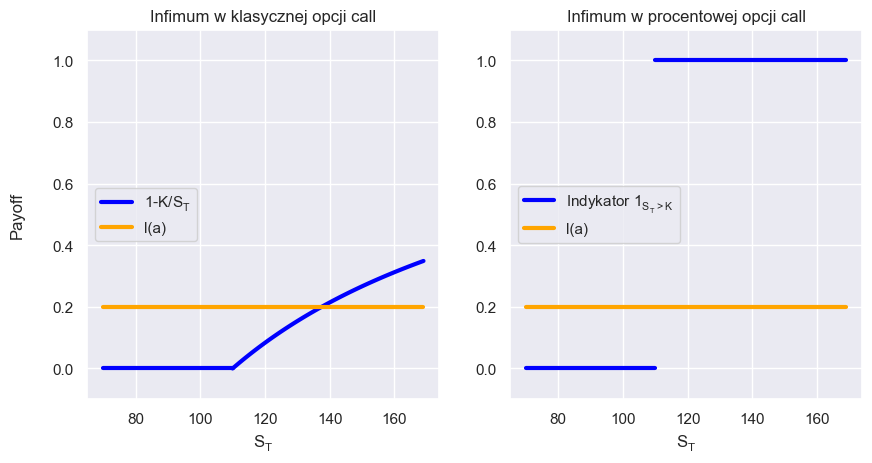

In [203]:
ST = np.arange(70,170,1)
K = 110

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{S_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{S_T}$')
#ax2.set_ylabel('Payoff', labelpad=20)

# Infimum w klasycznej opcji call
ax1.plot(ST[ST<=K],np.zeros(len(ST[ST<=K])), color = 'blue', linewidth = 3, label = '1-K/$\mathregular{S_T}$')
ax1.plot(ST[ST>=K],1-K/ST[ST>=K], color = 'blue', linewidth = 3)
ax1.plot(ST,0.2*np.ones(len(ST)), color = 'orange', linewidth = 3, label='l(a)')
ax1.set_title('Infimum w klasycznej opcji call')
ax1.set_xlabel('$\mathregular{S_T}$')
ax1.set_ylim([-0.1,1.1])
ax1.legend(loc="center left")

# Infimum w klasycznej opcji call
ax2.plot(ST[ST<=K],np.zeros(len(ST[ST<=K])), color = 'blue', linewidth = 3, label='Indykator $\mathregular{1_{S_T > K}}$' )
ax2.plot(ST[ST>=K],np.ones(len(ST[ST>=K])), color = 'blue', linewidth = 3)
ax2.plot(ST,0.2*np.ones(len(ST)), color = 'orange', linewidth = 3, label='l(a)')
ax2.set_title('Infimum w procentowej opcji call')
ax2.set_xlabel('$\mathregular{S_T}$')
ax2.set_ylim([-0.1,1.1])
ax2.legend(loc="center left")
plt.show()

#plt.plot(ST[ST<=K],np.zeros(len(ST[ST<=K])), color = 'blue', linewidth = 3, label='Indykator')
#plt.plot(ST[ST>=K],np.ones(len(ST[ST>=K])), color = 'blue', linewidth = 3)
#plt.plot(ST,0.7*np.ones(len(ST)), color = 'orange', linewidth = 3, label='l(a)')
#plt.xlabel('$\mathregular{S_T}$')
#plt.ylabel('Wartość', labelpad=20)
#plt.title('Poszukiwanie infimum')
#plt.legend(loc="upper left")

Widzimy więc, ze mamy trzy przypadki:

1. Jeśli $l(a) < 0$ to $Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) = 0$ 

2. Jeśli $l(a) \geq 1$ to $Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) = 1$

3. Jeśli $l(a) \in [0,1)$ to $Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) = Q^{*} \left(S_{T} \leq K \right)$

Okazuje się jednak, że zachodzi: 
$$Q^{*} \left(S_{T} > K \right) = 0$$

Dowód:
$$Q^{*} \left(S_{T} \leq K \right) = \mathbb{E}_{Q^{*}} \left[ \mathbb{1}_{\{ S_{T} \leq K \}} \right] = \mathbb{E}_{Q} \left[ \frac{dQ^{*}}{dQ} \mathbb{1}_{\{ S_{T} \leq K \}} \right] = \mathbb{E}_{Q} \left[ \frac{H}{H_{0}} \mathbb{1}_{\{ S_{T} \leq K \}} \right] = \mathbb{E}_{Q} \left[ \frac{\left( 1 - p \right) \cdot S_{T}  \cdot \mathbb{1}_{\{ S_{T} > K \}}}{H_{0}} \mathbb{1}_{\{ S_{T} \leq K \}} \right] = 0.$$

Redukuje to nam sytuację do dwóch przypadków

1. Jeśli $l(a) < 1$ to $Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) = 0$ 

2. Jeśli $l(a) \geq 1$ to $Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) = 1$

A ponieważ $l(a)$ jest malejące ze względu na $a$, to infimum jest osiagane rzeczywiście gdy $l(a) = 1$, co daje upragnioną równość.

# Wyniki drugiej funkcji celu na Procentowej Opcji Call

Przypomnijmy, że druga funckja celu jest maksymalizowana przez pełny hedging opcji o payoffie $\tilde{\phi} \cdot H$ dla

$$\tilde{\phi} = \mathbb{1}_{\{ \frac{dP}{dQ} \leq \tilde{a}H \}} + \gamma \cdot \mathbb{1}_{\{ \frac{dP}{dQ} = \tilde{a}H \}},$$
gdzie
$\gamma = \frac{\alpha - Q^{*}\left( \frac{dP}{dQ} \leq \tilde{a}H \right)}{Q^{*}\left( \frac{dP}{dQ} = \tilde{a}H \right)}.$ Otrzymany rezultat upraszcza tę sytuację do

$$\gamma = \frac{\alpha - 0}{1} = \alpha$$
i w konsekwencji
$$\tilde{\phi} = \alpha \cdot \mathbb{1}_{\{ \frac{dP}{dQ} = \tilde{a}H \}} = \frac{V_{0}}{H_{0}} \cdot \mathbb{1}_{\{ \frac{dP}{dQ} = \tilde{a}H \}}$$



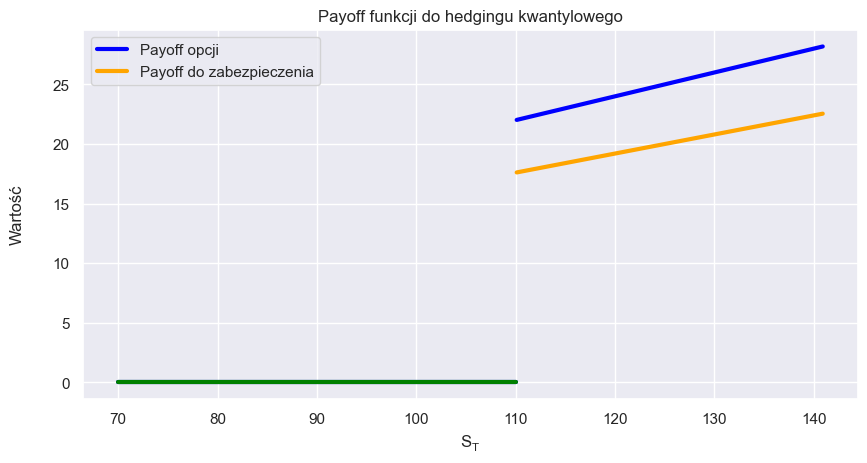

In [106]:
ST = np.arange(70,141,0.1)
X = np.zeros(shape=(len(ST),2))
X[:,0], X[:,1] = X0, ST
X = pd.DataFrame(X)

fig = plt.figure()
fig.set_figwidth(10)
plt.plot(ST[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3, label='Payoff opcji')
plt.plot(ST[ST>K],np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'blue', linewidth = 3)
plt.plot(ST[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'green', linewidth = 3)
plt.plot(ST[ST>K],0.8*np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'orange', linewidth = 3, label='Payoff do zabezpieczenia')
plt.xlabel('$\mathregular{S_T}$')
plt.ylabel('Wartość', labelpad=20)
plt.title('Payoff funkcji do hedgingu kwantylowego')
plt.legend(loc="upper left")

In [144]:
class Trader:
    def __init__(self, initial_capital):
        self.money = initial_capital
        self.delta = 0

    def update_portfolio(self, option, underlying_price, t, qh_boundary=None):
        if str(option.__class__).split("'")[1] == 'option.Vanilla':
            if qh_boundary:
                delta_curr = option.get_delta(underlying_price, t, qh_boundary)
            else:
                delta_curr = option.get_delta(underlying_price, t)
            self.money = self.money - (delta_curr - self.delta) * underlying_price
        elif str(option.__class__).split("'")[1] == 'option.Vanilla_on_NonTraded':
            delta_curr = option.get_MC_delta(*underlying_price, t)
            self.money = self.money - (delta_curr - self.delta) * underlying_price[0]
        else:
            delta_curr = option.get_MC_delta(underlying_price, t)
            self.money = self.money - (delta_curr - self.delta) * underlying_price
        self.delta = delta_curr

    def simulate_hedging(self, option, reality, update_freq=1, mode='standard', verbose=False,
                         invest_saved_money=(False, 0)):
        if mode == 'quantile_traded':
            if invest_saved_money[0]:
                saved_money = invest_saved_money[1] - self.money
            new_payoff_func, objective_func, qh_boundary = payoff_from_v0(option, self.money, float(reality[0]))
            if verbose:
                print(
                    f'Quantile Hedging with V0={self.money:.2f} should result success probability = {objective_func[0]:.4} and success ratio = {objective_func[1]:.44}')
            old_payoff_func = option.payoff_func
            setattr(option, 'payoff_func', new_payoff_func)
        elif mode == 'quantile_nontraded':
            if invest_saved_money[0]:
                saved_money = invest_saved_money[1] - self.money
            old_m = option.m
            option.set_m(V0=self.money, X0_t=reality[0].iloc[0, 0], X0_nt=reality[1].iloc[0, 0])
            objective_func = ('not defined', 'not defined')
            qh_boundary = None
        else:
            if invest_saved_money[0]:
                raise Exception('In full hedging there is no saved money to be invested')
            objective_func = (1, 1)
            qh_boundary = None
        values_per_expirance = option.underlying.values_per_year * option.T
        money_historical = []
        delta_historical = []
        update_days = np.arange(0, values_per_expirance, update_freq)
        for num in range(values_per_expirance):
            reality_today = [float(reality[0][num]), float(reality[1][num])] if mode == 'quantile_nontraded' else float(
                reality[num])
            if num in update_days:
                t = num / option.underlying.values_per_year
                self.update_portfolio(option, reality_today, t, qh_boundary)
                if verbose:
                    print(
                        f'Portfolio update at t={t}! Current status\n\tMONEY: {self.money:.2f}\n\tUNDERLYING: {self.delta:.4f}')
            self.money *= np.exp(option.underlying.r / option.underlying.values_per_year)
            money_historical.append(self.money)
            delta_historical.append(self.delta)
        # get rid of underlying
        reality_today = float(reality[0][num]) if mode == 'quantile_nontraded' else float(reality[num])
        self.money = self.money + self.delta * reality_today
        self.delta = 0
        delta_historical.append(self.delta)
        if verbose:
            print(
                f'All of held underlying {"sold" if self.delta >= 0 else "repaid"}! Current status\n\tMONEY: {self.money:.2f}\n\tUNDERLYING: {self.delta:.4f}')
        if mode == 'quantile_traded':
            setattr(option, 'payoff_func', old_payoff_func)
        elif mode == 'quantile_nontraded':
            setattr(option, 'm', old_m)
            # payoff
        payoff = float(option.payoff_func(reality[1])) if mode == 'quantile_nontraded' else float(
            option.payoff_func(reality))

        target = [None,None]

        if self.money+self.delta*reality >= payoff or payoff == 0:
            target[1] = 1
            target[0] = 1

        else:
            target[1] = self.money/payoff
            target[0] = 0

        self.money -= payoff

        if invest_saved_money[0]:
            self.money += saved_money * np.exp(option.underlying.r * option.T)

        money_historical.append(self.money)
        if verbose:
            print(
                f'Payoff of {payoff:.2f} paid to the option owner! Current status\n\tMONEY: {self.money:.2f}\n\tUNDERLYING: {self.delta:.4f}')

        return money_historical, delta_historical, target

In [2]:
alphas = np.arange(0.15,1,0.2)
repeat = 1000

mu = 0.06
sigma =  0.2
r = 0.03
T = 1
X0 = 100
repeat = 20
values_per_year = 250
K = 110

def measure_payoff(X,p,K):
    return (1-p)*X.iloc[:, -1]*(X.iloc[:, -1] > K)

underlying = Underlying(mu, sigma, r, values_per_year)
_, reality = underlying.simulate_P(repeat, T)
option = Option(underlying,lambda X : measure_payoff(X,p,K),T)
Measure_Price = option.get_MC_price(X0)

Collection_Funkcja_Uno_Mean = []
Collection_Funkcja_Dos_Mean = []

for a in alphas:
    funkcja_uno = np.zeros(reality.shape[0])
    funkcja_dos = np.zeros(reality.shape[0])
    for i in tqdm(range(repeat)):
        trader = Trader(initial_capital = a*Measure_Price)
        dont_mind, don_care, obj = trader.simulate_hedging(option, X0*reality.iloc[[i],:], update_freq = 1)
        funkcja_uno[i] = obj[0]
        funkcja_dos[i] = obj[1]
    Collection_Funkcja_Uno_Mean.append(np.mean(funkcja_uno))
    Collection_Funkcja_Dos_Mean.append(np.mean(funkcja_dos))

100%|██████████| 20/20 [02:44<00:00,  8.22s/it]


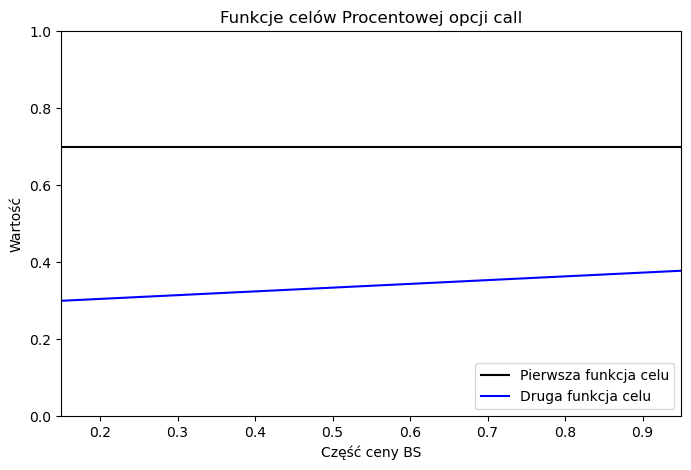

In [4]:
fig = plt.figure()
fig.set_figwidth(8,5)
fig.set_figheight(5)
plt.plot(alphas, Collection_Funkcja_Uno_Mean, color = 'black')
plt.plot(alphas, Collection_Funkcja_Dos_Mean, color = 'blue')
plt.legend(['Pierwsza funkcja celu', 'Druga funkcja celu'], loc = 'lower right')
plt.title('Funkcje celów Procentowej opcji call')
plt.xlabel('Część ceny BS')
plt.ylabel('Wartość')
plt.xlim([min(alphas),max(alphas)])
plt.ylim([0,1])
plt.show()